In [314]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[:,:]
    y = y[:,:]
    return X, y


In [3]:
X, y = load_data()

In [4]:
X.shape , y.shape

((5000, 400), (5000, 1))

In [5]:
#to check that what is the data in output
y_df = pd.DataFrame(y)
y_df.value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: count, dtype: int64

In [6]:
X[0].shape

(400,)

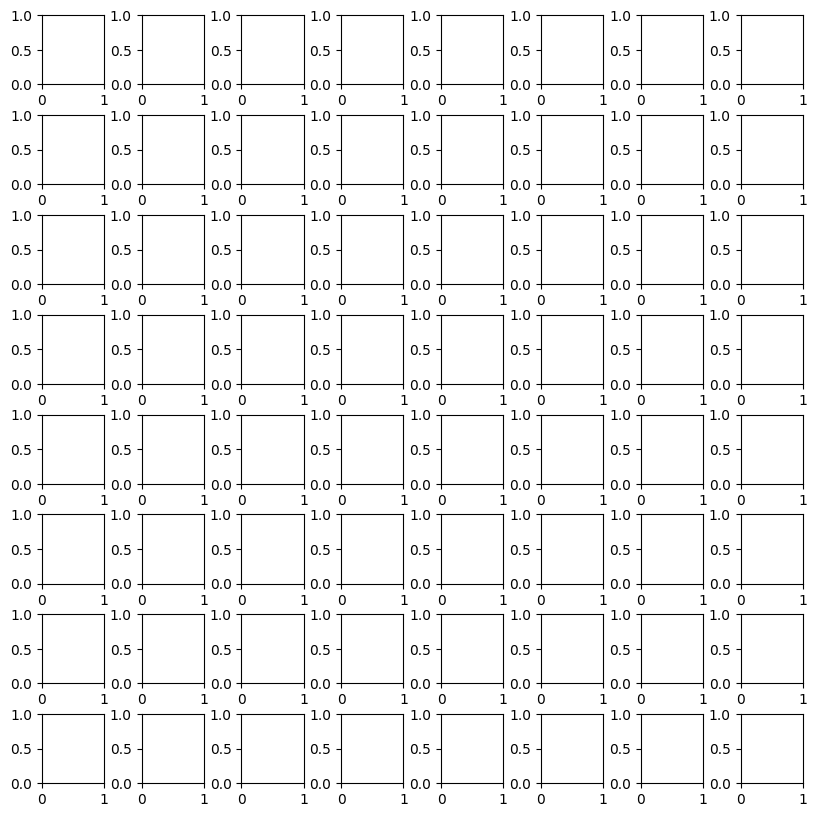

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

In [8]:
l = []
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    l.append(str(random_index))
    
# Select rows corresponding to the random indices and
# reshape the image
    

In [9]:
# just to check length of random_index
len(l)

64

In [10]:
X_random_reshaped = X[random_index].reshape(20,20)

In [11]:
len(X[random_index])

400

In [12]:
(X[random_index]).reshape(20,20).shape

(20, 20)

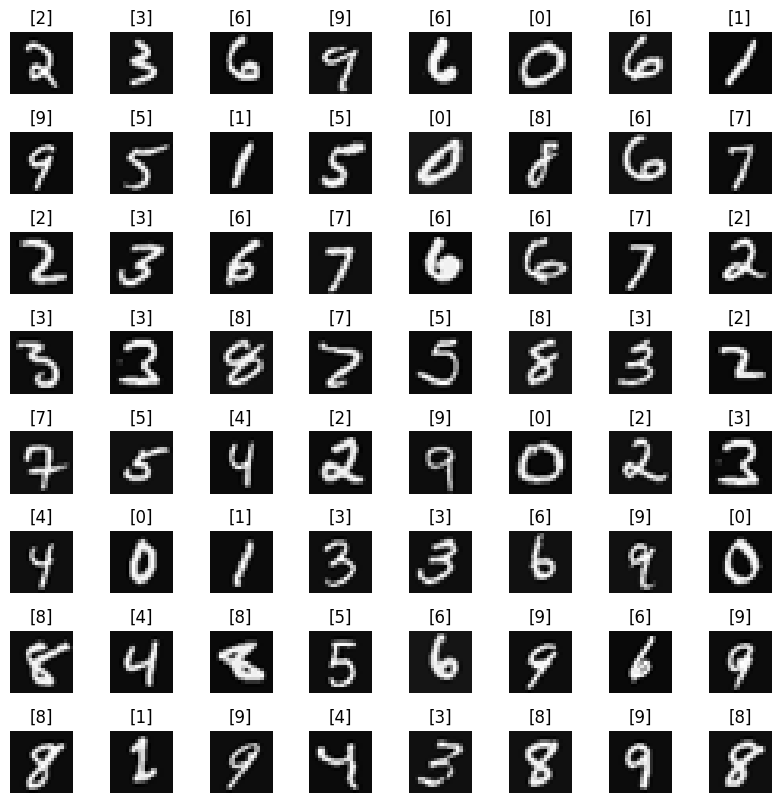

In [13]:
#just visulizing the data and checking weather it matches with y label or not

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape(20,20).T  #here transpose is taken because data by .reshape(20,20) was generating images horizontally
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index])
    ax.set_axis_off()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_test.shape

(1000, 400)

In [291]:
model = Sequential([
    tf.keras.Input(shape=(400,)),
        Dense(130, activation ='relu'),
        Dense(60, activation ='relu'),
        Dense(10, activation ='linear')
])

In [292]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 130)               52130     
                                                                 
 dense_35 (Dense)            (None, 60)                7860      
                                                                 
 dense_36 (Dense)            (None, 10)                610       
                                                                 
Total params: 60,600
Trainable params: 60,600
Non-trainable params: 0
_________________________________________________________________


In [293]:
# Sparse Categorical Cross-Entropy is a loss function used in machine learning for classification tasks.
# It measures the difference between the predicted probability distribution and the true probability distribution of the target classes.

# Components of the term:
# - Sparse: Target labels are single integers representing the class index, not one-hot encoded vectors.
#   Each target label is a single number indicating the true class.

# - Categorical: The problem involves assigning input samples to one and only one category or class.

# - Cross-Entropy: A concept from information theory, it quantifies the difference between two probability distributions.
#   In classification, it measures the difference between predicted probabilities and true probabilities.

# In Sparse Categorical Cross-Entropy, predicted probabilities are compared to true class labels.
# The loss value indicates how well predicted probabilities match the true class distribution.
# During training, the goal is to minimize this loss, adjusting the model's parameters to improve predictions.



#from_logits=True: This parameter indicates whether the input to the 
#loss function is already in the form of logits or raw model outputs, 
#or whether it's probabilities. Logits are the raw values that are produced
#by the final layer of the neural network, before they are transformed into
#probabilities using a softmax activation function.


#When from_logits=True, it means that the predicted_probs (or logits) passed 
#to the loss function are the raw output of the neural network without being 
#processed through a softmax activation. The loss function internally applies 
#the softmax function to these logits before calculating the loss.
#This is often preferred because it can lead to more numerically 
#table calculations and better convergence during training.

In [294]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(X_train,y_train,epochs=80)

Epoch 1/80
125/125 [==============================] - 0s 1ms/step - loss: 0.9001
Epoch 2/80
125/125 [==============================] - 0s 1ms/step - loss: 0.3148
Epoch 3/80
125/125 [==============================] - 0s 1ms/step - loss: 0.2247
Epoch 4/80
125/125 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 5/80
125/125 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 6/80
125/125 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 7/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0920
Epoch 8/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0710
Epoch 9/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 10/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0454
Epoch 11/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 12/80
125/125 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 13/80
125/125 [====

In [295]:
# Epochs and Batches
# In the compile statement above, the number of epochs was set to 165.
# This specifies that the entire data set should be applied during training 165 times.
# During training, you see output describing the progress of training that looks like this:

# Epoch 1/165
# 157/157 [==============================] - 0s 1ms/step - loss: 2.2770

# The first line, Epoch 1/165, describes which epoch the model is currently running.
# For efficiency, the training data set is broken into 'batches'.
# The default size of a batch in TensorFlow is 32.
# There are 5000 examples in our data set or roughly 157 batches.
# The notation on the 2nd line 157/157 [==== is describing which batch has been executed.


5000/32

156.25

In [296]:
y_train[1015]

array([3], dtype=uint8)

In [297]:
#now lets try to predict it on a single point X[1015]

X_try = 1015
def display_digit(index):
    fig, axes = plt.subplots(1,1, figsize=(1,1))
    fig.tight_layout(pad=0.1)
    X_reshaped = X_train[index].reshape((20,20)).T
    plt.imshow(X_reshaped,cmap='gray')
    plt.title(y_train[X_try,0])
    plt.axis('off')
    plt.show()
    

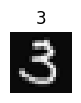

In [298]:
display_digit(X_try)

In [299]:
type(X_try)

int

In [300]:
prediction = model.predict(X_train[X_try].reshape(1,400))
prediction

1/1 [==============================] - 0s 42ms/step


array([[-12.671851 ,  -4.688727 ,  -7.5481906,  26.566189 , -28.869171 ,
          8.096123 , -27.458612 , -17.198662 ,   1.0854627,   3.4220896]],
      dtype=float32)

In [301]:
type(prediction)

numpy.ndarray

In [302]:
prediction.flatten().tolist()

[-12.67185115814209,
 -4.688726902008057,
 -7.548190593719482,
 26.56618881225586,
 -28.869171142578125,
 8.096122741699219,
 -27.4586124420166,
 -17.19866180419922,
 1.0854626893997192,
 3.4220895767211914]

In [303]:


# Convert NumPy array to a list of (index, element) tuples
tuple_with_index = [(index, element) for index, element in enumerate(prediction.flatten().tolist())]

# Convert the list of tuples to a tuple
tuple_with_index = tuple(tuple_with_index)

print(tuple_with_index)


((0, -12.67185115814209), (1, -4.688726902008057), (2, -7.548190593719482), (3, 26.56618881225586), (4, -28.869171142578125), (5, 8.096122741699219), (6, -27.4586124420166), (7, -17.19866180419922), (8, 1.0854626893997192), (9, 3.4220895767211914))


In [304]:
# Sort the tuple based on the second value (element) in descending order
sorted_tuple = sorted(tuple_with_index, key=lambda x: x[1], reverse=True)

print(sorted_tuple[0][0])


3


In [305]:
##so we predicted data as shown above
# now lets apply softmax fn on last layer of the model 

In [306]:
prediction_p = tf.nn.softmax(prediction)


In [307]:
# NOT IMPORTANT
# just for validation

tuple_with_index = [(index, element) for index, element in enumerate(prediction_p.numpy().flatten().tolist())]

# Convert the list of tuples to a tuple
sorted_tuple = sorted(tuple_with_index, key=lambda x: x[1], reverse=True)

sorted_tuple


[(3, 1.0),
 (5, 9.518143606612739e-09),
 (9, 8.88474571691944e-11),
 (8, 8.587390347425394e-12),
 (1, 2.6678583387590438e-14),
 (2, 1.5286675708432664e-15),
 (0, 9.101968724191558e-18),
 (7, 9.84389260649057e-20),
 (6, 3.44608601077734e-24),
 (4, 8.4087040609462e-25)]

In [308]:
np.sum(prediction_p) #as we can see the total of the probability of all num = 1

1.0

In [309]:
yhat = np.argmax(prediction_p)
yhat

3

1/1 [==============================] - 0s 16ms/step


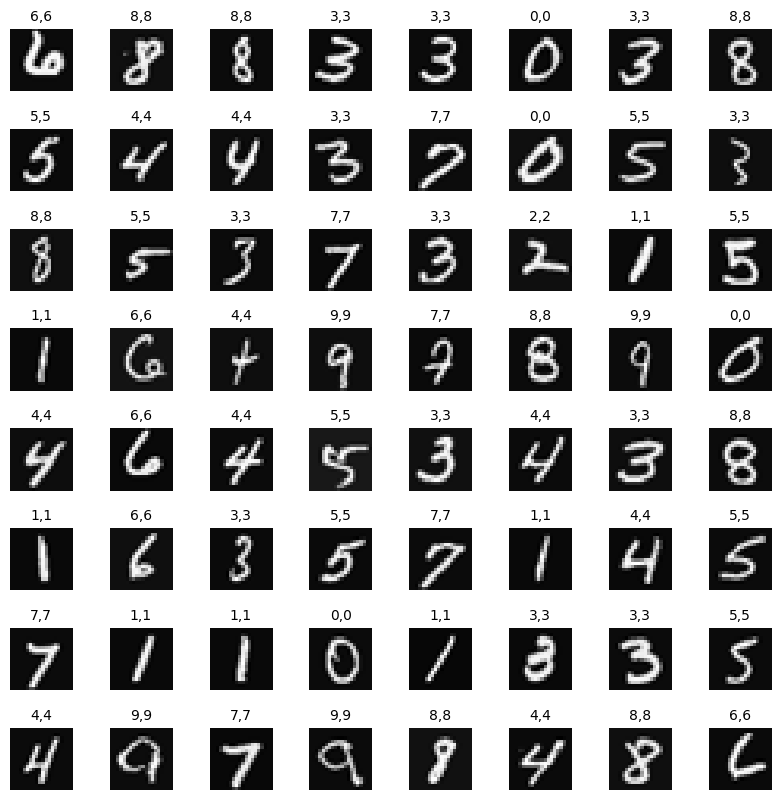

In [310]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X_train.shape
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index].reshape(20,20).T  #here transpose is taken because data by .reshape(20,20) was generating images horizontally
    ax.imshow(X_random_reshaped, cmap='gray')
    
    
    prediction = model.predict(X_train[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)    
    
    
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()

plt.show()    

In [311]:
def display_errors(model, X, y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:, 0]
    idxs = np.where(yhat != y[:, 0])[0]
    
    num_errors = len(idxs)  # Calculate the total number of errors
    
    if num_errors == 0:
        print("no errors found")
    else:
        rows = (num_errors + 3) // 4  # Calculate the number of rows for the subplot grid
        fig, ax = plt.subplots(rows, 4, figsize=(4, 0.8 * rows))
        fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.97])  # Adjust rect for spacing
        
        for i in range(num_errors):
            row = i // 4
            col = i % 4
            j = idxs[i]
            X_reshaped = X[j].reshape((20, 20)).T

            # Display the image
            ax[row, col].imshow(X_reshaped, cmap='gray')
            
            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1, 400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[row, col].set_title(f"{y[j, 0]},{yhat}", fontsize=10)
            ax[row, col].set_axis_off()
                
    print(num_errors, 'errors out of', len(X), 'images')



In [312]:
display_errors(model,X_train,y_train)

125/125 [==============================] - 0s 749us/step
no errors found
0 errors out of 4000 images


1/1 [==============================] - 0s 16ms/step
54 errors out of 1000 images


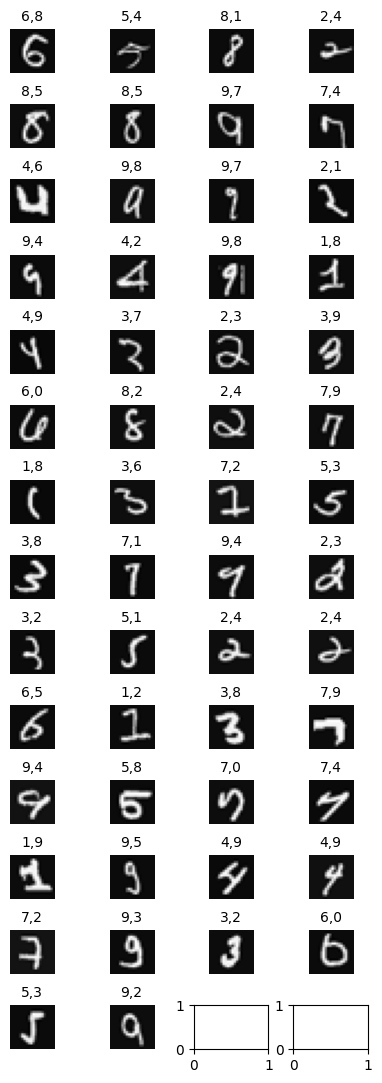

In [313]:
display_errors(model,X_test,y_test)

In [320]:
l =[]
for i in range(len(X_test)):
    prediction = model.predict(X_test[i].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)    
    l.append(np.argmax(prediction_p) )


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


AttributeError: 'list' object has no attribute 'toarray'

In [323]:
y_pred = np.array(l)

In [326]:
precision_per_class = precision_score(y_test, y_pred, average=None)

# Calculate average precision
average_precision = sum(precision_per_class) / len(precision_per_class)

print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)

Precision per class: [0.97368421 0.96190476 0.9245283  0.93975904 0.8989899  0.95876289
 0.97916667 0.97196262 0.90588235 0.93518519]
Average Precision: 0.9449825917665745
